In [1]:
import pandas as pd 
import numpy as np 
import os 

#for pretty figures
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick",labelsize=12)
mpl.rc("ytick",labelsize=12)

#where im going to save my figures

root_dir = "."
project_id = "computer_hardware"
image_path = os.path.join(root_dir,"images",project_id)

def save_fig(fig_id, tight_layout=True, fig_extension="png", fig_dimension=300):
    os.makedirs(image_path, exist_ok=True)
    fig_path = os.path.join(image_path,fig_id+"."+fig_extension)
    print("saving...", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_path,dpi=fig_dimension)

In [2]:
computer_data = pd.read_csv("machine.data", names=["vendor_id","model_id","Machine_cycle","min_main_mem",
                                                     "max_main_mem", "cache_mem", "min_channel", "max_channel",
                                                    "pub_rel_per","est_rel_per"])
computer_data.head()

,vendor_id,model_id,Machine_cycle,min_main_mem,max_main_mem,cache_mem,min_channel,max_channel,pub_rel_per,est_rel_per
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
computer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor_id        209 non-null object
model_id         209 non-null object
Machine_cycle    209 non-null int64
min_main_mem     209 non-null int64
max_main_mem     209 non-null int64
cache_mem        209 non-null int64
min_channel      209 non-null int64
max_channel      209 non-null int64
pub_rel_per      209 non-null int64
est_rel_per      209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [4]:
computer_data.isnull().sum()

vendor_id        0
model_id         0
Machine_cycle    0
min_main_mem     0
max_main_mem     0
cache_mem        0
min_channel      0
max_channel      0
pub_rel_per      0
est_rel_per      0
dtype: int64

In [5]:
computer_data.describe()

,Machine_cycle,min_main_mem,max_main_mem,cache_mem,min_channel,max_channel,pub_rel_per,est_rel_per
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [6]:
comp_data =  computer_data.drop(["vendor_id","model_id"], axis=1)

saving... histograms_of_data


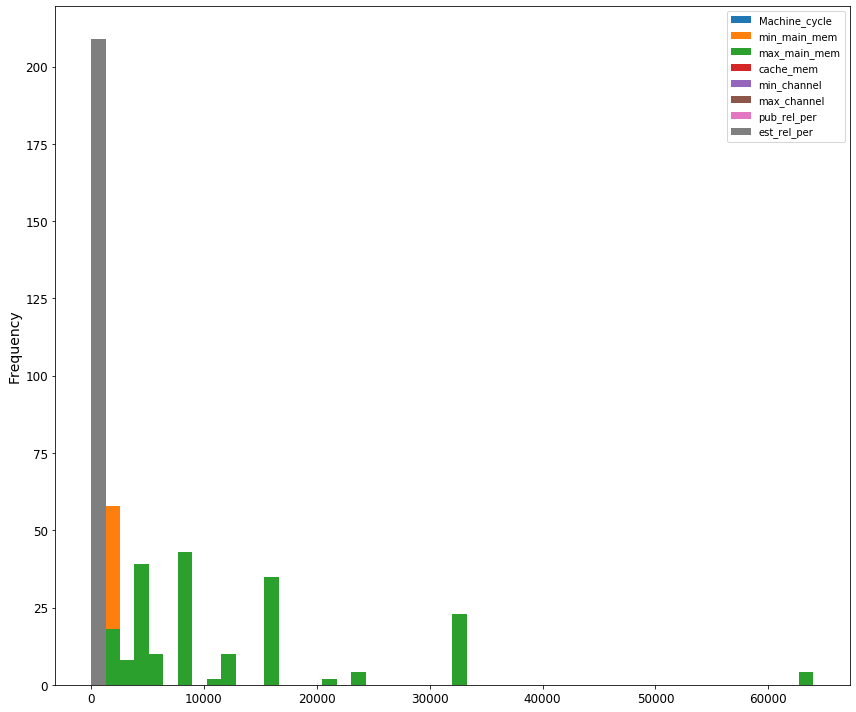

In [7]:
comp_data.plot.hist(bins=50, figsize=(12,10))
save_fig("histograms_of_data")
plt.show()

we are going to create a correlation matrix to better understand our data and their relative correlations

In [8]:
corr_matrix = comp_data.corr()
corr_matrix["est_rel_per"].sort_values(ascending=False)

est_rel_per      1.000000
pub_rel_per      0.966472
max_main_mem     0.901202
min_main_mem     0.819292
cache_mem        0.648620
min_channel      0.610580
max_channel      0.592156
Machine_cycle   -0.288396
Name: est_rel_per, dtype: float64

saving... scatter_matrix_of_attributes


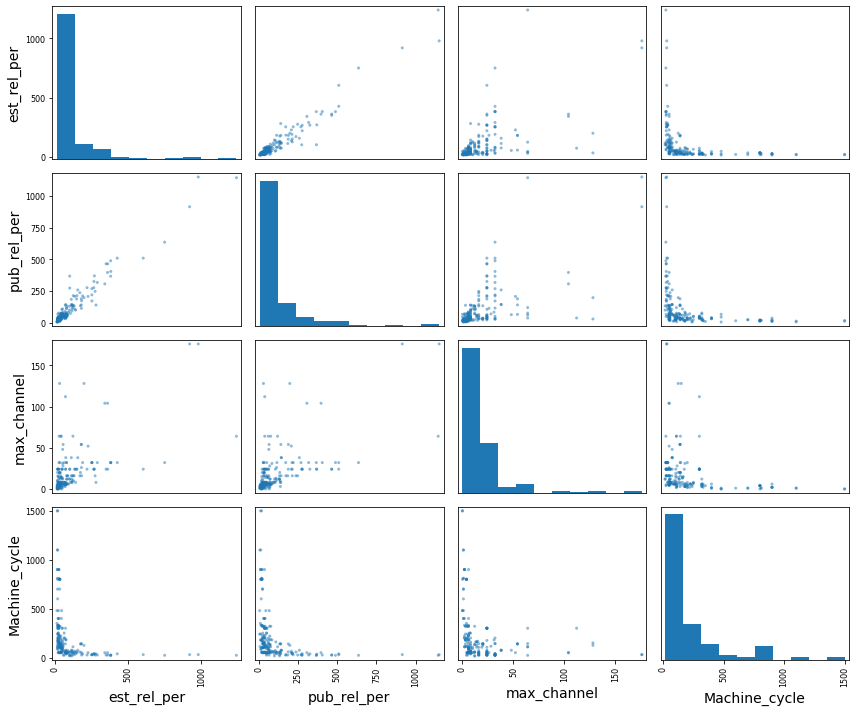

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["est_rel_per","pub_rel_per", "max_channel","Machine_cycle"]
scatter_matrix(comp_data[attributes], figsize=(12,10))
save_fig("scatter_matrix_of_attributes")
plt.show()

# lets select the best fit model

In [10]:
x = np.array(comp_data.drop(["est_rel_per"], axis=1))
y = np.array(comp_data["est_rel_per"].copy())

from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
predicted = lin_reg.predict(x_test)
some_predicted= predicted[:5]
for x in range (len(some_predicted)):
    print(some_predicted[x], x_test[x],y_test[x])

162.47569286804816 [  25 1310 2620  131   12   24  274] 102
11.587990574156024 [ 200 1000 4000    0    1    4   30] 25
11.923492689762895 [ 330 1000 4000    0    3    6   22] 25
768.1643248462517 [   30  8000 64000    96    12   176   915] 919
37.849387431524065 [ 800  256 8000    0    1    4   16] 34


In [13]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

54.844232442107746

Our root mean squared error for this model is 54

In [14]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, predicted)
lin_mae

25.51571758619034

Our mean absolute error for the model is 25

We will compare our model with mutilple other models:

# decision tree:

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [16]:
tree_predictions = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

80.61814754933107

Our root mean squared error for the decision tree regressor model is 80

# svm: 

In [17]:
# from sklearn.svm import SVR

# svm_reg = SVR(kernel="linear")
# svm_reg.fit(x_train, y_train)
# svm_predictions = svm_reg.predict(x_test)
# svm_mse = mean_squared_error(y_test, svm_predictions)
# svm_rmse = np.sqrt(svm_mse)
# svm_rmse

Our root mean squared error for the svm is 40.78

# KNN

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=2)
knn_reg.fit(x_train, y_train)
knn_predictions = knn_reg.predict(x_test)
knn_mse = mean_squared_error(y_test,knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

65.74708032626674

Our root mean squared error for the KNN is 65.75

after analyzing some different models we were going to use svm because it gives us the least rsme: 40.78, but its runtime is very long:

   "from sklearn.model_selection import cross_val_score
   scores = cross_val_score(svm_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
   tree_rmse_scores = np.sqrt(scores)" 
   It took forever to run this piece of code


Therefore the best model for this scenario will be linear regression.

# Fine tune our model

In [19]:
from sklearn.model_selection import cross_val_score

# get the accuracy of our linear regression model 10-fold
lin_scores = cross_val_score(lin_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [20]:
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

In [21]:
display_scores(lin_rmse_scores)

scores: [78.49191933 41.23694196 20.36291233 15.64737802 22.34314072 24.07761956
 41.00445529 17.40982718 20.82415469 14.21186499]
mean: 29.561021407317913
standard deviation: 18.65865272766001


In [22]:
tree_scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [23]:
display_scores(tree_rmse_scores)

scores: [74.23927928 50.85562032 37.25429308 34.81885899 54.85864187 41.84354613
 80.96731367 15.36432556 36.92221553 13.15532212]
mean: 44.02794165519027
standard deviation: 20.98055614039111


In [24]:
knn_scores = cross_val_score(knn_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)

In [25]:
display_scores(knn_rmse_scores)

scores: [116.1208169   23.51438859  32.72096827   9.03262062  47.11110148
  13.49455228  15.6157914   26.12559808  48.42181198   7.923462  ]
mean: 34.00811115905464
standard deviation: 30.59267249992228


So far, the best model is the linear regression model, but let's try some ensemble learning:

# Ensemble learning

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

gbr_reg = GradientBoostingRegressor(random_state=42, n_estimators=10)
gbr_reg.fit(x_train, y_train)
gbr_predictions = gbr_reg.predict(x_test)
gbr_mse = mean_squared_error(y_test,gbr_predictions)
gbr_rmse = np.sqrt(gbr_mse)
gbr_rmse

114.70928995383119

In [27]:
rf_reg = RandomForestRegressor(random_state=42, n_estimators=10)
rf_reg.fit(x_train, y_train)
rf_predictions = rf_reg.predict(x_test)
rf_mse = mean_squared_error(y_test,rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

82.43614845095914

After all these analyses we figured that linear works best for our model but lets fid the best hyperparameters for it

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"fit_intercept" : [True,False], "normalize":[True,False], "copy_X":[True,False]}
    ] 
grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

C:\Users\17814\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid=[{'copy_X': [True, False],
                          'fit_intercept': [True, False],
                          'normalize': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

The best hyperparameters found will be:

In [29]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [30]:
grid_search.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [31]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

31.37728893937219 {'copy_X': True, 'fit_intercept': True, 'normalize': True}
31.37728893937227 {'copy_X': True, 'fit_intercept': True, 'normalize': False}
34.017485407780434 {'copy_X': True, 'fit_intercept': False, 'normalize': True}
34.017485407780434 {'copy_X': True, 'fit_intercept': False, 'normalize': False}
31.37728893937219 {'copy_X': False, 'fit_intercept': True, 'normalize': True}
31.37728893937227 {'copy_X': False, 'fit_intercept': True, 'normalize': False}
34.017485407780434 {'copy_X': False, 'fit_intercept': False, 'normalize': True}
34.017485407780434 {'copy_X': False, 'fit_intercept': False, 'normalize': False}


As we can see, the grid_search did not give us a better rmse than the default linear regression, so we will use the simple linear regression.we can compute the 95% confidence for the test Rmse chosen in the linear regression:

In [32]:
from scipy import stats

In [33]:
confidence = 0.95
squared_errors = (predicted - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(abs(mean - tmargin)), np.sqrt(mean + tmargin)

(35.33342280698274, 85.23045483619629)

In [34]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(abs(mean - zmargin)), np.sqrt(mean + zmargin)

(33.509515387641194, 84.49063430843947)

this range provides us with a 95 percent confidence levels, meaning that Strictly speaking a 95% confidence interval means that if we were to take 100 different samples and compute a 95% confidence interval for each sample, then approximately 95 of the 100 confidence intervals will contain the true mean value. our model is then ready to  be launched! Happy learning!